In [3]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
#import datasets
sentiment_df = pd.read_csv('fear_greed_index.csv')
trader_df = pd.read_csv('historical_data.csv')



FileNotFoundError: [Errno 2] No such file or directory: 'fear_greed_index.csv'

In [ ]:
#analysing the dataset
sentiment_df.shape
sentiment_df.info()
sentiment_df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
#cleaning the dataset
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
sentiment_df = sentiment_df[['date', 'classification']]
sentiment_df['classification'] = sentiment_df['classification'].astype('category')

In [ ]:
#analysing the dataset
trader_df.shape
trader_df.info()
trader_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
#cleaning the dataset
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD','Closed PnL', 'Start Position','Fee']
for col in numeric_cols:
    trader_df[col] = pd.to_numeric(trader_df[col], errors='coerce'
trader_df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
#merging the datasets
trader_df['Date'] = trader_df['Timestamp IST'].dt.date
sentiment_df['Date'] = sentiment_df['date'].dt.date
merged_df = pd.merge(trader_df, sentiment_df[['Date', 'classification']], on='Date', how='left')
le=LabelEncoder()
col=['Coin','Side','Direction','Crossed']
for i in col:
    merged_df[i]=le.fit_transform(merged_df[i])


<Figure size 800x600 with 0 Axes>

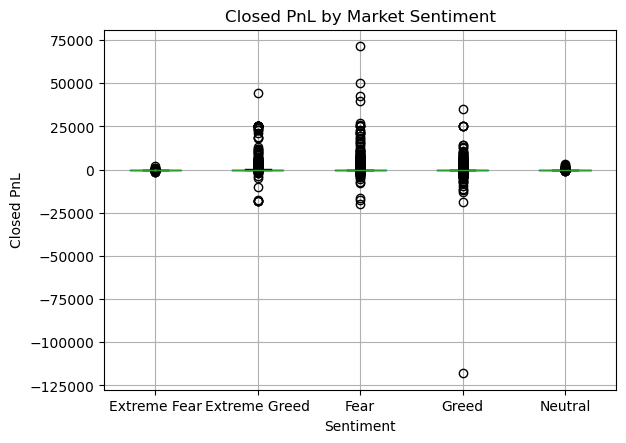

In [ ]:
#plotting a box plot between Closed PnL by classification
plt.figure(figsize=(8,6))
merged_df.boxplot(column='Closed PnL', by='classification')
plt.title('Closed PnL by Market Sentiment')
plt.suptitle('')
plt.xlabel('Sentiment')
plt.ylabel('Closed PnL')
plt.show()


<Figure size 800x600 with 0 Axes>

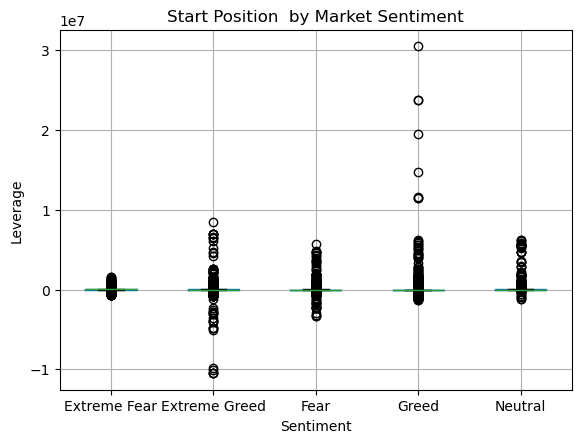

In [ ]:
#plotting a box plot between Start Position by classification
plt.figure(figsize=(8,6))
merged_df.boxplot(column='Start Position', by='classification')
plt.title('Start Position  by Market Sentiment')
plt.suptitle('')
plt.xlabel('Sentiment')
plt.ylabel('Leverage')
plt.show()

In [ ]:
#computing the trade_volume
def compute_trade_volume(row):
    return row['Size USD'] * row['Execution Price']
merged_df['trade_volume'] = merged_df.apply(compute_trade_volume, axis=1)

<Figure size 800x600 with 0 Axes>

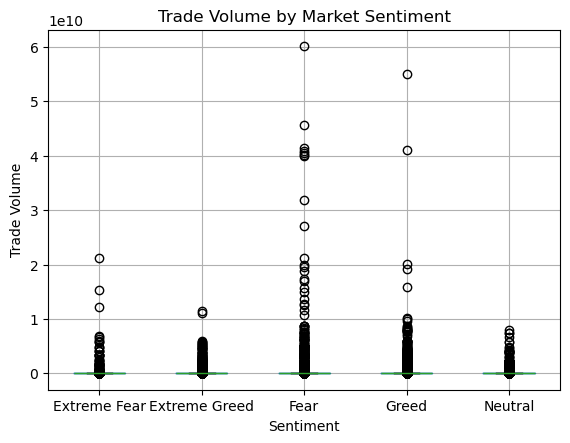

In [ ]:
#plotting a box plot between trade_volume by classification
plt.figure(figsize=(8,6))
merged_df.boxplot(column='trade_volume', by='classification')
plt.title('Trade Volume by Market Sentiment')
plt.suptitle('')
plt.xlabel('Sentiment')
plt.ylabel('Trade Volume')
plt.show()


In [ ]:
#grouping the fear and greed classification
grp_fear = merged_df[merged_df['classification'] == 'Fear']['Closed PnL']
grp_greed = merged_df[merged_df['classification'] == 'Greed']['Closed PnL']
grp_fear.info()
grp_greed.info()


<class 'pandas.core.series.Series'>
Index: 13869 entries, 190 to 209976
Series name: Closed PnL
Non-Null Count  Dtype  
--------------  -----  
13869 non-null  float64
dtypes: float64(1)
memory usage: 216.7 KB
<class 'pandas.core.series.Series'>
Index: 11292 entries, 0 to 205834
Series name: Closed PnL
Non-Null Count  Dtype  
--------------  -----  
11292 non-null  float64
dtypes: float64(1)
memory usage: 176.4 KB


In [ ]:
#performing test statistics between fear_group and greed_group
t_stat, p_value = ttest_ind(grp_fear, grp_greed, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")


T-statistic: 4.266, P-value: 0.0000



Correlation matrix:
               Closed PnL  trade_volume
Closed PnL      1.000000      0.057216
trade_volume    0.057216      1.000000


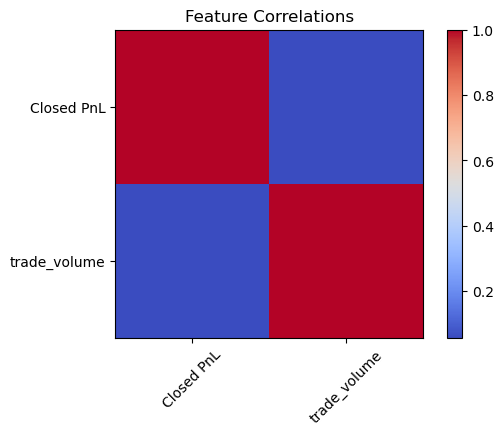

In [ ]:
#correlation matrix between Closed Pnl and trade_volume
corr_matrix = merged_df[['Closed PnL','trade_volume']].corr()
print("\nCorrelation matrix:\n", corr_matrix)
plt.figure(figsize=(6,4))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(); plt.xticks([0,1], corr_matrix.columns, rotation=45)
plt.yticks([0,1], corr_matrix.columns); plt.title('Feature Correlations'); plt.show()

In [ ]:
#computing the label profit
def label_profit(pnl):
    return 1 if pnl > 0 else 0
merged_df['profit_flag'] = merged_df['Closed PnL'].apply(label_profit)

In [ ]:
#splitting the data for training and testing
features = ['Coin','Execution Price','Size Tokens','Size USD','Direction','Crossed','Start Position','Fee']
X = merged_df[features]
y = merged_df['profit_flag']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

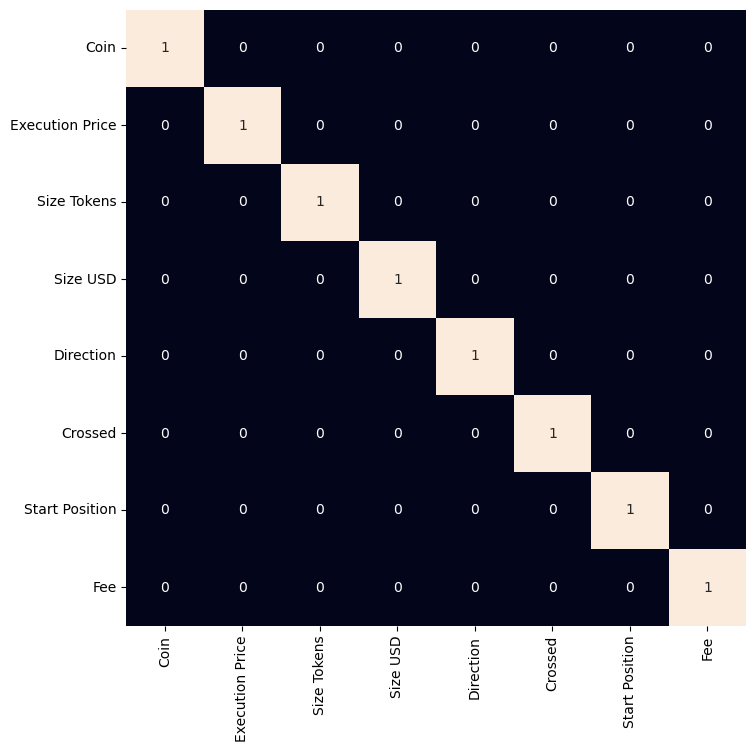

In [ ]:
#heatmap which describes correlation between each cloumn
plt.figure(figsize=(8, 8))
sns.heatmap(X.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()

In [ ]:
#training the model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.92      0.81     37234
           1       0.81      0.50      0.62     26134

    accuracy                           0.75     63368
   macro avg       0.77      0.71      0.71     63368
weighted avg       0.76      0.75      0.73     63368

Confusion Matrix:
 [[34229  3005]
 [13064 13070]]


In [ ]:
#saving the merged_data
merged_df.to_csv('merged_enriched_trader_sentiment.csv', index=False)